In [49]:
"""
This one is for finding good proteins to use for this example


"""
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1' 
import numpy as np
import itertools as it
import multiprocess
import matplotlib.pyplot as plt
from umap.umap_ import UMAP


#from GW_prot import *


import sys
sys.path.insert(0,'../src')
from FGW_protein import *
from FGW_protein_pI import *

In [50]:
"""
To do
- main thing is find a better set of proteins to work with
"""

'\nTo do\n- main thing is find a better set of proteins to work with\n'

This example demonstrates variants of Gromov-Wasserstein which can be computed with GWProt. The dataset used in this example includes XXXXXX

We define a helper method to compute pairwise all-vs-all GW distances, then display 
to compute the [silhoutte score](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20score%20is%20specialized,distance%20or%20the%20Manhattan%20distance.) and [Davies-Bouldin score](https://en.wikipedia.org/wiki/Davies–Bouldin_index), two basic measures of clustering to evaluate the accuracy of different methods in GWProt. A higher silhoutte score and lower Davies-Bouldin score mean better clustering.

In [51]:
from sklearn.metrics import silhouette_score # higher is better, 0 is overlapping
from sklearn.metrics import davies_bouldin_score #lower is better

def get_clustering(dmat, inds1, inds2, umap = False):
    N = len(inds1 + inds2)
    
    dist_mat = dmat[np.ix_(inds1 + inds2,inds1 + inds2)]
    labels = [0]*len(inds1) + [1]*len(inds2)

    s_score = silhouette_score(X = dist_mat, labels = labels, metric='precomputed')
    db_score = davies_bouldin_score(dist_mat, labels = labels)

    if umap:
        print(f"Silhouette Score: {s_score}")
        print(f"Davies-Bouldin Score: {db_score}")

        reducer = UMAP(metric = 'precomputed', random_state=1)
        embedding = reducer.fit_transform(dist_mat)
        plt.figure(figsize=(5, 5))
        plt.scatter(embedding[:, 0], embedding[:, 1], c= ['red' if labels[i] else 'blue' for i in range(N)], s=5)
        plt.show()
    return s_score, db_score


import random
random.seed(1)

def random_combination(iterable, r):
    "Random selection from itertools.combinations(iterable, r)"  
    pool = tuple(iterable)
    n = len(pool)
    indices = sorted(random.sample(range(n), r))
    return tuple(pool[i] for i in indices)


In [9]:
!ls '../../../Data/Palmstrub Computation Results/Palmstrub npy results'

 DALI_out,200.csv.npy
 DALI_out.csv.npy
'FGW200_a=0.02.csv_fixed.npy'
'FGW200_alpha=0.02.csv.npy'
'FGW200_alpha=0.02_corrected.csv.npy'
'FGW200_alpha=0.02_scaled.csv.npy'
'FGW200_alpha=0.02_scaled.csv_fixed.npy'
'FGW200_alpha=0.05.csv.npy'
'FGW200_alpha=0.05_sqrt.csv.npy'
'FGW200_alpha=0.05_sqrt.csv_fixed.npy'
 FGW_strat,all,scaled.csv.npy
 FGW_strat,scaled,all.csv.npy
 Foldseek_Palmstrub_3Di_alignment_raw.csv.npy
 Foldseek_raw.csv.npy
 GW_100.csv.npy
 GW_100.v2.csv.npy
 GW_200.csv.npy
 GW_50..csv.npy
 GW_50.csv.npy
 GW_50.v2.csv.npy
 GW_all,200.csv.npy
 GW_clustered,50.csv.npy
'Palmstrub truncated GW200.csv.npy'
'Palmstrub_FGW200_alpha=0.05_median_sqrt.csv_fixed.npy'
 Palmstrub_GW100_idinit.csv.npy
 Palmstrub_GW100_idinit_sqrt.csv.npy
 Palmstrub_GW200_global_seq_align.csv.npy
 Palmstrub_GW200_idinit.csv.npy
'Palmstrub_GW200_idinit_stride_a=3.csv.npy'
 Palmstrub_GW200_scaled_ssearch_seq_align.csv.npy
 Palmstrub_GW200_scaled_ssearch_seq_alignREDO.csv.npy
 Palmstrub_GW200_sqrt_idinit.csv

In [32]:
files = ['Palmstrub_GW100_idinit.csv.npy',
'Palmstrub_GW100_idinit_sqrt.csv.npy',
'Palmstrub_GW200_idinit.csv.npy',
'GW_100.v2.csv.npy',
'palmstrub_FGW200_Idinit_sqrtscaled.csv.npy',
'Palmstrub_GW200_global_seq_align.csv.npy',
'Palmstrub_GW200_scaled_ssearch_seq_alignREDO.csv.npy']

In [13]:
# data that's the same throughout all runs
import json

Taxonomy_array = np.load('../../PGC020.a5/Taxonomy_array.npy')
all_files = os.listdir("../../../Data/palmstrub")
palmstrub_list = all_files
with open("../../PGC020.a5/test_anot.json", "r") as f:
    data = json.load(f)
doubled_pdb = "rdrp.abc.YP_009273004"
data['names'].index(doubled_pdb)
for k in data.keys():
    
    data[k].pop(2632)

decoy_list = []
counter = 0
for file in all_files:
    if 'ecoy' in file:
        decoy_list.append('decoy')
    else:
        decoy_list.append('rdrp')


In [24]:
taxonomy_level = 4
clade_dict = {}
for i in range(5127):
    if Taxonomy_array[i][taxonomy_level] != -1 and Taxonomy_array[i][taxonomy_level] != '-1': 
         clade_dict[data['names'][i]] = Taxonomy_array[i][taxonomy_level]


# make list of the indices of the phylla
phyllum_indices_dict = {}
for phyllum in [' Duplornaviricota', ' Kitrinoviricota', ' Lenarviricota', ' Negarnaviricota', ' Pisuviricota']:
    phyllum_indices_dict[phyllum] = []
    for i in range(5127):
        file = all_files[i].removesuffix('.pdb')
        if file not in clade_dict.keys():
            continue
        if clade_dict[all_files[i].removesuffix('.pdb')] == phyllum:
            phyllum_indices_dict[phyllum].append(i)
            

            
    
        

#    ' Duplornaviricota' : 'red',
#     ' Kitrinoviricota': 'orange',
#     ' Lenarviricota' : 'green',
#   ' Negarnaviricota':'dodgerblue',
# ' Pisuviricota': 'mediumpurple',

Silhouette Score: 0.06061066380469136
Davies-Bouldin Score: 2.9313454351506554


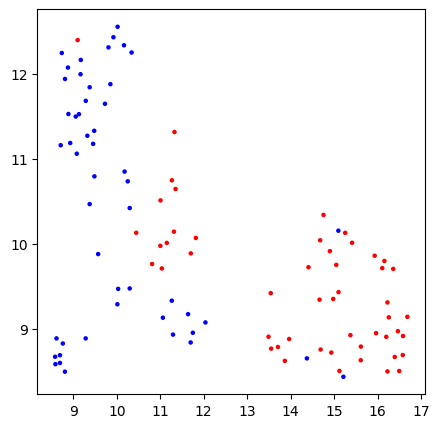

(0.06061066380469136, 2.9313454351506554)

In [36]:
file = 'FGW200_alpha=0.02_corrected.csv.npy'
phyllum1 = ' Duplornaviricota'
phyllum2 = ' Pisuviricota'
N = 50

dmat = np.load('../../../Data/Palmstrub Computation Results/Palmstrub npy results/' + file)

inds1 = random_combination(phyllum_indices_dict[phyllum1], N)
inds2 = random_combination(phyllum_indices_dict[phyllum2], N)
get_clustering(dmat= dmat, inds1= inds1, inds2 = inds2, umap= True)

In [45]:
for pair in it.combinations([' Duplornaviricota', ' Kitrinoviricota', ' Lenarviricota', ' Negarnaviricota', ' Pisuviricota'],2):
    

    phyllum1 , phyllum2 = pair
    N = 50
    inds1 = random_combination(phyllum_indices_dict[phyllum1], N)
    inds2 = random_combination(phyllum_indices_dict[phyllum2], N)
    
    results = []
    print(pair)
    
    for file in files:
    
    
        dmat = np.load('../../../Data/Palmstrub Computation Results/Palmstrub npy results/' + file)
        s, db = get_clustering(dmat= dmat, inds1= inds1, inds2 = inds2, umap= False)
        results.append((file, s, db))
    
    for a in sorted(results, key = lambda x: x[2]):
        print(a)
    print('*************************')
    # for a in sorted(results, key = lambda x: x[1], reverse=True):
    #     print(a)

(' Duplornaviricota', ' Lenarviricota')

(' Duplornaviricota', ' Kitrinoviricota')
('Palmstrub_GW200_scaled_ssearch_seq_alignREDO.csv.npy', 0.1335590803156291, 2.127387316253504)
('Palmstrub_GW200_global_seq_align.csv.npy', 0.1276693847233032, 2.163616788292505)
('Palmstrub_GW200_idinit.csv.npy', 0.1088885267854536, 2.2881111056978956)
('Palmstrub_GW100_idinit.csv.npy', 0.10243945622023938, 2.302543522246586)
('Palmstrub_GW100_idinit_sqrt.csv.npy', 0.11327051731021304, 2.491529398358626)
('palmstrub_FGW200_Idinit_sqrtscaled.csv.npy', 0.10541724455904777, 2.53557906962687)
('GW_100.v2.csv.npy', 0.0588271082108828, 2.947095655180902)
*************************
(' Duplornaviricota', ' Lenarviricota')
('Palmstrub_GW200_scaled_ssearch_seq_alignREDO.csv.npy', 0.11446966344165366, 2.561539473753295)
('Palmstrub_GW200_global_seq_align.csv.npy', 0.11166720459647779, 2.7889870695595547)
('palmstrub_FGW200_Idinit_sqrtscaled.csv.npy', 0.08500229968693988, 2.9732523921787664)
('Palmstrub_GW100_idinit_sqrt.csv.npy', 0.07993719283531486, 3.0

In [48]:
phyllum_indices_dict[' Lenarviricota']

[532,
 572,
 584,
 585,
 776,
 794,
 795,
 796,
 816,
 982,
 984,
 1012,
 1014,
 1083,
 1154,
 1245,
 1246,
 1268,
 1316,
 1320,
 1321,
 1322,
 1323,
 1324,
 1325,
 1326,
 1342,
 1343,
 1344,
 1359,
 1377,
 1378,
 1379,
 1380,
 1381,
 1501,
 1502,
 1511,
 1817,
 1818,
 1824,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1837,
 1838,
 1840,
 1841,
 1842,
 1889,
 1891,
 1892,
 1893,
 1894,
 1899,
 1980,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2036,
 2086,
 2091,
 2756,
 2835,
 2865,
 2895,
 2946,
 2988,
 2989,
 3027,
 3044,
 3061,
 3087,
 3163,
 3164,
 3166,
 3167,
 3168,
 3217,
 3241,
 3243,
 3245,
 3304,
 3305,
 3339,
 3358,
 3418,
 3455,
 3499,
 3501,
 3503,
 3504,
 3578,
 3719,
 3723,
 3724,
 3778,
 3829,
 3830,
 3848,
 3881,
 3913,
 3917,
 3918,
 3919,
 3920,
 3921,
 3949,
 3951,
 3952,
 3953,
 4960,
 5031]

The main class in GWProt is `FGW_protein`, whose objects contain the relevant data for a protein including the coordinates of each alpha-Carbon, the sequence, and the intra-protein distance matrix, an array containing all pairwise distances between alpha-Carbons. We can initialize objects in this class from PDB (protein databank) files.

In [ ]:
base_prots = [FGW_protein.make_protein_from_pdb(file) for file in decoys + rdrps]

For faster computations, we can downsample to an evenly spaced subset of the residues:

In [ ]:
downsamped_100_prots = [p.downsample_n(n=100) for p in base_prots]

We can also rescale the intra-protein distance matrices, where computing GW distances gives greater weight to local distances.

In [ ]:
scaled_prots = [p.scale_ipdm(inplace = False) for p in base_prots]

We can also combine both variants and confirm that the order does not matter:

In [ ]:
downsampled_then_scaled_prots = [p.scale_ipdm(inplace = False) for p in downsamped_100_prots]
scaled_then_downsampled_prots = [p.downsample_n(n=100) for p in scaled_prots]
assert downsampled_then_scaled_prots == scaled_then_downsampled_prots

In [ ]:
compute_in_parallel(proteins=base_prots, comparison_method= FGW_protein.run_GW)

In [ ]:
compute_in_parallel(proteins=downsamped_100_prots, comparison_method= FGW_protein.run_GW)

In [ ]:
compute_in_parallel(proteins=downsampled_then_scaled_prots, comparison_method= FGW_protein.run_GW)

In [ ]:
%%time 
# compute GW
GW_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_GW(base_prots[pair[0]], base_prots[pair[1]])), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        GW_dist_mat[i,j] = d
        GW_dist_mat[j,i] = d

# 4min 11s

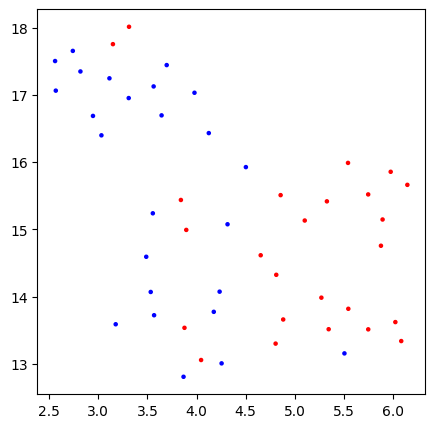

Silhouette Score: 0.07705666396146785
Davies-Bouldin Index: 3.2617971105781196


In [61]:
display_clustering(GW_dist_mat)
show_silhouette_score(GW_dist_mat)
show_davies_bouldin_score(GW_dist_mat)

In [ ]:
%%time
# compute GW downsampled
GW_downsampled_dist_mat = np.zeros((50,50))


with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_GW(downsamped_100_prots[pair[0]], downsamped_100_prots[pair[1]])), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        GW_downsampled_dist_mat[i,j] = d
        GW_downsampled_dist_mat[j,i] = d
#3m 38s

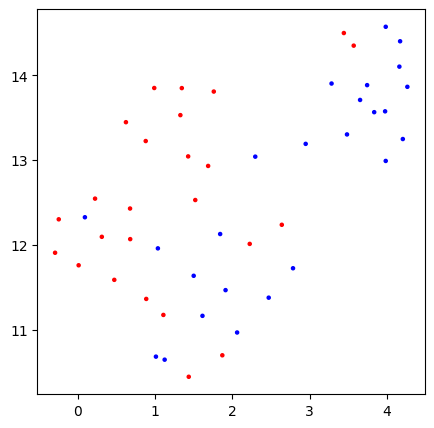

Silhouette Score: 0.07531142497516866
Davies-Bouldin Index: 3.307621161194969


In [62]:
display_clustering(GW_downsampled_dist_mat)
show_silhouette_score(GW_downsampled_dist_mat)
show_davies_bouldin_score(GW_downsampled_dist_mat)

In [ ]:
%%time
# compute GW scaled
GW_scaled_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_GW(scaled_prots[pair[0]], scaled_prots[pair[1]])), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        GW_scaled_dist_mat[i,j] = d
        GW_scaled_dist_mat[j,i] = d

# 7m 41s  - oddly long

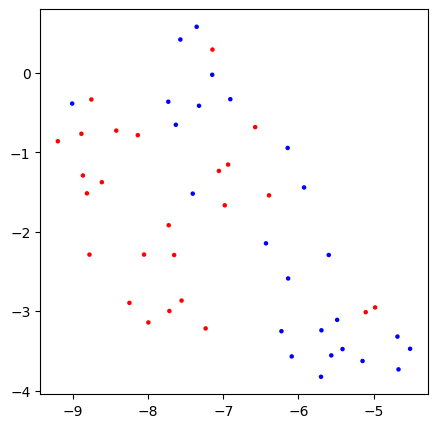

Silhouette Score: 0.07531908169808643
Davies-Bouldin Index: 3.279929473003541


In [63]:
display_clustering(GW_scaled_dist_mat)
show_silhouette_score(GW_scaled_dist_mat)
show_davies_bouldin_score(GW_scaled_dist_mat)

In [ ]:
%%time
# compute GW scaled and downsampled
GW_scaled_downsampled_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_GW(downsampled_then_scaled_prots[pair[0]], downsampled_then_scaled_prots[pair[1]])), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        GW_scaled_downsampled_dist_mat[i,j] = d
        GW_scaled_downsampled_dist_mat[j,i] = d
# 6m27s

In [ ]:
# compute GW with cells
cells = [p.make_GW_cell() for p in base_prots]

In [ ]:
%%time
# compute GW
GW_cells_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_GW_from_cells(cells[pair[0]], cells[pair[1]])), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        GW_cells_dist_mat[i,j] = d
        GW_cells_dist_mat[j,i] = d


assert np.isclose(GW_cells_dist_mat, GW_dist_mat).all()
#4m 15s

In [15]:
from FGW_matrices import *
BLOSUM62_dict = get_BLOSUM(n = 62, raw = True)

compute_in_parallel(proteins=base_prots, comparison_method=FGW_protein.run_FGW_dict, alpha = 0.5,d = get_BLOSUM(n = 62, raw = True))

In [16]:
%%time 
# compute FGW
FGW_BLOSUM62_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_FGW_dict(base_prots[pair[0]], base_prots[pair[1]], alpha = 0.5,d = BLOSUM62_dict )), it.combinations(range(50),2))

    # results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_FGW_dict(base_prots[pair[0]], base_prots[pair[1]], alpha = 0.5,d = hydrophobicity_dict )), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        FGW_BLOSUM62_dist_mat[i,j] = d
        FGW_BLOSUM62_dist_mat[j,i] = d

#6m
# Note that these are not all metrics so may not satisfy the mathematical results

CPU times: user 12.1 s, sys: 1.44 s, total: 13.5 s
Wall time: 6min


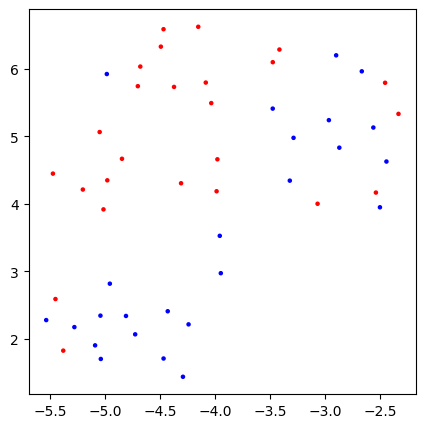

Silhouette Score: 0.07239025056064756
Davies-Bouldin Index: 3.291403640654677


In [64]:
display_clustering(FGW_BLOSUM62_dist_mat)
show_silhouette_score(FGW_BLOSUM62_dist_mat)
show_davies_bouldin_score(FGW_BLOSUM62_dist_mat)

In [18]:
%%time
#We can also use user-inputted data
eccentricity_lists = [p.get_eccentricity() for p in base_prots]
FGW_eccentricity_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_FGW_data_lists(base_prots[pair[0]], 
                                                                                 base_prots[pair[1]], 
                                                                                 data1 = eccentricity_lists[pair[0]],
                                                                                 data2 = eccentricity_lists[pair[1]],
                                                                                 alpha = 0.5)), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        FGW_eccentricity_dist_mat[i,j] = d
        FGW_eccentricity_dist_mat[j,i] = d
#5m 58s

CPU times: user 12.1 s, sys: 1.4 s, total: 13.5 s
Wall time: 5min 58s


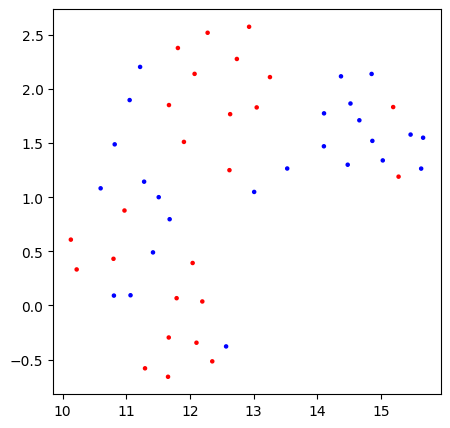

Silhouette Score: 0.0747812492900918
Davies-Bouldin Index: 3.2810461880631734


In [65]:
display_clustering(FGW_eccentricity_dist_mat)
show_silhouette_score(FGW_eccentricity_dist_mat)
show_davies_bouldin_score(FGW_eccentricity_dist_mat)

In [20]:
import importlib
importlib.reload(sys.modules['FGW_protein_pI'])

<module 'FGW_protein_pI' from '/home/elijah/dropbox3/Analyses/PGC020.a12/Examples/../src/FGW_protein_pI.py'>

In [21]:

# FGW_protein_pI

base_prots_pI = [FGW_protein_pI.make_protein_from_pdb(file) for file in decoys + rdrps]

# cast to FGW_protein and show they're equal
assert base_prots == [p.FGW_protein() for p in base_prots_pI]

# compute FGW
# sequence based-downsampling
# uniform downsampling

In [ ]:
compute_in_parallel(proteins=base_prots_pI, comparison_method= FGW_protein_pI.run_FGW, alpha = 0.5)

In [22]:
%%time
FGW_pI_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein_pI.run_FGW(base_prots_pI[pair[0]], base_prots_pI[pair[1]], alpha = 0.5, )), it.combinations(range(50),2))

    # results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein.run_FGW_dict(base_prots[pair[0]], base_prots[pair[1]], alpha = 0.5,d = hydrophobicity_dict )), it.combinations(range(50),2))
    for r in results:
        i,j,d = r
        FGW_pI_dist_mat[i,j] = d
        FGW_pI_dist_mat[j,i] = d
#5m 51s

CPU times: user 11.7 s, sys: 1.46 s, total: 13.2 s
Wall time: 5min 51s


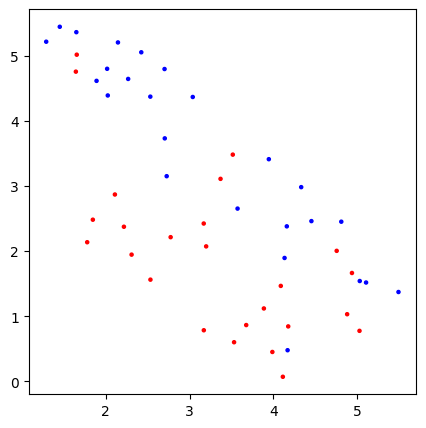

Silhouette Score: 0.07470840967504097
Davies-Bouldin Index: 3.274830503361593


In [66]:
display_clustering(FGW_pI_dist_mat)
show_silhouette_score(FGW_pI_dist_mat)
show_davies_bouldin_score(FGW_pI_dist_mat)

In [28]:
FGW_downsampled = [p.downsample_n(100) for p in base_prots_pI]

In [ ]:
compute_in_parallel(proteins=FGW_downsampled, comparison_method= FGW_protein_pI.run_FGW, alpha = 0.5)

In [29]:
%%time
FGW_pI_downsampled_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein_pI.run_FGW(FGW_downsampled[pair[0]], FGW_downsampled[pair[1]], alpha = 0.5, )), it.combinations(range(50),2))

    for r in results:
        i,j,d = r
        FGW_pI_downsampled_dist_mat[i,j] = d
        FGW_pI_downsampled_dist_mat[j,i] = d


CPU times: user 1.73 s, sys: 422 ms, total: 2.15 s
Wall time: 4.27 s


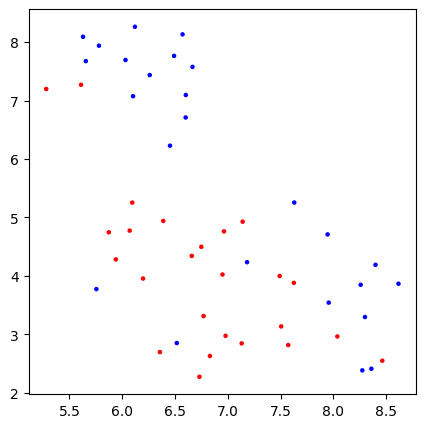

Silhouette Score: 0.05932563534012502
Davies-Bouldin Index: 3.5070692611878083


In [67]:
display_clustering(FGW_pI_downsampled_dist_mat)
show_silhouette_score(FGW_pI_downsampled_dist_mat)
show_davies_bouldin_score(FGW_pI_downsampled_dist_mat)

In [ ]:
compute_in_parallel(proteins=base_prots_pI, comparison_method= FGW_protein_pI.run_FGW_seq_aln, alpha = 1)

In [32]:
%%time
GW_seq_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein_pI.run_FGW_seq_aln(base_prots_pI[pair[0]], base_prots_pI[pair[1]], alpha = 1, )), it.combinations(range(50),2))

    for r in results:
        i,j,d = r
        GW_seq_dist_mat[i,j] = d
        GW_seq_dist_mat[j,i] = d




CPU times: user 1.45 s, sys: 592 ms, total: 2.04 s
Wall time: 2.94 s


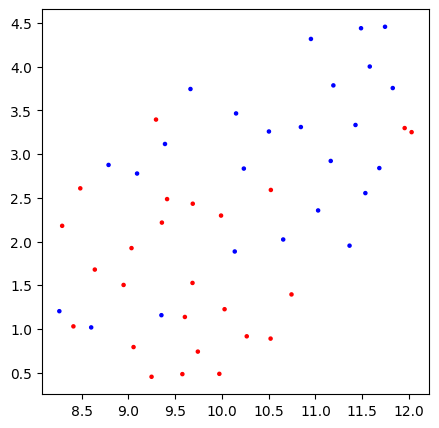

Silhouette Score: 0.03836803074819825
Davies-Bouldin Index: 4.142159369705593


In [68]:
display_clustering(GW_seq_dist_mat)
show_silhouette_score(GW_seq_dist_mat)
show_davies_bouldin_score(GW_seq_dist_mat)

In [ ]:
compute_in_parallel(proteins=base_prots_pI, comparison_method= FGW_protein_pI.run_FGW_seq_aln, alpha = 0.5)

In [35]:
%%time
FGW_seq_dist_mat = np.zeros((50,50))

with multiprocess.Pool() as pool:
    results = pool.imap(lambda pair: (pair[0], pair[1], FGW_protein_pI.run_FGW_seq_aln(FGW_downsampled[pair[0]], FGW_downsampled[pair[1]], alpha = 0.5, )), it.combinations(range(50),2))

    for r in results:
        i,j,d = r
        FGW_seq_dist_mat[i,j] = d
        FGW_seq_dist_mat[j,i] = d




CPU times: user 1.34 s, sys: 596 ms, total: 1.94 s
Wall time: 2.74 s


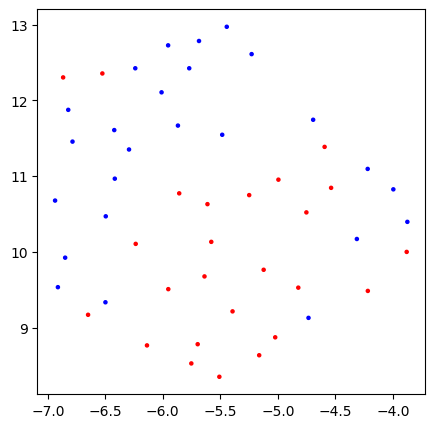

Silhouette Score: 0.03624816214462871
Davies-Bouldin Index: 4.201138911711315


In [69]:
display_clustering(FGW_seq_dist_mat)
show_silhouette_score(FGW_seq_dist_mat)
show_davies_bouldin_score(FGW_seq_dist_mat)